In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, LabelEncoder

loading dataset

In [2]:
data=pd.read_csv('SYB61_12_Agricultural Production Indices.csv', skiprows=1)

# Perform a cursory examination of the CSV file to get a feel

In [3]:
data.shape

(3760, 7)

In [4]:
print( list(data.columns)   )

['Region/Country/Area', 'Unnamed: 1', 'Year', 'Series', 'Value', 'Footnotes', 'Source']


In [5]:
data.head(10)

Region/Country/Area                     Unnamed: 1  Year  \
0                    1  Total, all countries or areas  1975   
1                    1  Total, all countries or areas  1985   
2                    1  Total, all countries or areas  1995   
3                    1  Total, all countries or areas  2005   
4                    1  Total, all countries or areas  2010   
5                    1  Total, all countries or areas  2014   
6                    1  Total, all countries or areas  2015   
7                    1  Total, all countries or areas  2016   
8                    1  Total, all countries or areas  1975   
9                    1  Total, all countries or areas  1985   

                                              Series  Value Footnotes  \
0  Agricultural production (Index Base: 2004-2006...   51.3       NaN   
1  Agricultural production (Index Base: 2004-2006...   65.5       NaN   
2  Agricultural production (Index Base: 2004-2006...   78.3       NaN   
3  Agricultural production (Index Base: 2004-2006...   99.9       NaN   
4  Agricultural production (Index Base: 2004-2006...  112.9       NaN   
5  Agricultural production (Index Base: 2004-2006...  124.6       NaN   
6  Agricultural production (Index Base: 2004-2006...  125.9       NaN   
7  Agricultural production (Index Base: 2004-2006...  127.3       NaN   
8      Food production (Index Base: 2004-2006 = 100)   51.0       NaN   
9      Food production (Index Base: 2004-2006 = 100)   65.0       NaN   

                                              Source  
0  Food and Agriculture Organization of the Unite...  
1  Food and Agriculture Organization of the Unite...  
2  Food and Agriculture Organization of the Unite...  
3  Food and Agriculture Organization of the Unite...  
4  Food and Agriculture Organization of the Unite...  
5  Food and Agriculture Organization of the Unite...  
6  Food and Agriculture Organization of the Unite...  
7  Food and Agriculture Organization of the Unite...  
8  Food and Agriculture Organization of the Unite...  
9  Food and Agriculture Organization of the Unite...

In [6]:
data.tail(10)

Region/Country/Area           Unnamed: 1  Year  \
3750                   97  European Union (EU)  2015   
3751                   97  European Union (EU)  2016   
3752                   97  European Union (EU)  1975   
3753                   97  European Union (EU)  1985   
3754                   97  European Union (EU)  1995   
3755                   97  European Union (EU)  2005   
3756                   97  European Union (EU)  2010   
3757                   97  European Union (EU)  2014   
3758                   97  European Union (EU)  2015   
3759                   97  European Union (EU)  2016   

                                                 Series  Value Footnotes  \
3750  Agricultural production (Index Base: 2004-2006...  103.2       NaN   
3751  Agricultural production (Index Base: 2004-2006...  101.8       NaN   
3752      Food production (Index Base: 2004-2006 = 100)   83.0       NaN   
3753      Food production (Index Base: 2004-2006 = 100)   95.6       NaN   
3754      Food production (Index Base: 2004-2006 = 100)   95.2       NaN   
3755      Food production (Index Base: 2004-2006 = 100)   99.0       NaN   
3756      Food production (Index Base: 2004-2006 = 100)   99.9       NaN   
3757      Food production (Index Base: 2004-2006 = 100)  103.6       NaN   
3758      Food production (Index Base: 2004-2006 = 100)  103.4       NaN   
3759      Food production (Index Base: 2004-2006 = 100)  102.0       NaN   

                                                 Source  
3750  Food and Agriculture Organization of the Unite...  
3751  Food and Agriculture Organization of the Unite...  
3752  Food and Agriculture Organization of the Unite...  
3753  Food and Agriculture Organization of the Unite...  
3754  Food and Agriculture Organization of the Unite...  
3755  Food and Agriculture Organization of the Unite...  
3756  Food and Agriculture Organization of the Unite...  
3757  Food and Agriculture Organization of the Unite...  
3758  Food and Agriculture Organization of the Unite...  
3759  Food and Agriculture Organization of the Unite...

In [7]:
data.sample(15)

Region/Country/Area           Unnamed: 1  Year  \
2852                  498  Republic of Moldova  2010   
1086                  170             Colombia  1975   
2266                  466                 Mali  1995   
2235                  458             Malaysia  2005   
369                     9              Oceania  2014   
2786                  620             Portugal  1975   
3166                  710         South Africa  1975   
2424                  504              Morocco  1975   
1275                  208              Denmark  2014   
3119                  703             Slovakia  2014   
1315                  214   Dominican Republic  2014   
3486                  800               Uganda  2015   
2890                  642              Romania  2010   
3310                  762           Tajikistan  2015   
445                     4          Afghanistan  1985   

                                                 Series  Value Footnotes  \
2852  Agricultural production (Index Base: 2004-2006...   92.8       NaN   
1086      Food production (Index Base: 2004-2006 = 100)   45.2       NaN   
2266  Agricultural production (Index Base: 2004-2006...   70.5       NaN   
2235  Agricultural production (Index Base: 2004-2006...   99.7       NaN   
369   Agricultural production (Index Base: 2004-2006...  110.4       NaN   
2786  Agricultural production (Index Base: 2004-2006...   81.7       NaN   
3166  Agricultural production (Index Base: 2004-2006...   65.1       NaN   
2424  Agricultural production (Index Base: 2004-2006...   37.7       NaN   
1275      Food production (Index Base: 2004-2006 = 100)  102.8       NaN   
3119      Food production (Index Base: 2004-2006 = 100)   96.2       NaN   
1315  Agricultural production (Index Base: 2004-2006...  137.8       NaN   
3486  Agricultural production (Index Base: 2004-2006...   93.8       NaN   
2890      Food production (Index Base: 2004-2006 = 100)   90.1       NaN   
3310      Food production (Index Base: 2004-2006 = 100)  181.0       NaN   
445   Agricultural production (Index Base: 2004-2006...   69.1       NaN   

                                                 Source  
2852  Food and Agriculture Organization of the Unite...  
1086  Food and Agriculture Organization of the Unite...  
2266  Food and Agriculture Organization of the Unite...  
2235  Food and Agriculture Organization of the Unite...  
369   Food and Agriculture Organization of the Unite...  
2786  Food and Agriculture Organization of the Unite...  
3166  Food and Agriculture Organization of the Unite...  
2424  Food and Agriculture Organization of the Unite...  
1275  Food and Agriculture Organization of the Unite...  
3119  Food and Agriculture Organization of the Unite...  
1315  Food and Agriculture Organization of the Unite...  
3486  Food and Agriculture Organization of the Unite...  
2890  Food and Agriculture Organization of the Unite...  
3310  Food and Agriculture Organization of the Unite...  
445   Food and Agriculture Organization of the Unite...

In [8]:
#Does the source column change
data['Source'].unique()

array(['Food and Agriculture Organization of the United Nations (FAO), Rome, FAOSTAT database, last accessed May 2018.'],
      dtype=object)

In [9]:
#Does footnote colmn contain Nan only
checkNaN=data.isna()
NaNStatus=checkNaN['Footnotes']
data['NaNStatus']=NaNStatus

In [10]:
data[data['NaNStatus']==False]
#only 16 records are not Nan for footnote

Region/Country/Area Unnamed: 1  Year  \
1030                  156      China  1975   
1031                  156      China  1985   
1032                  156      China  1995   
1033                  156      China  2005   
1034                  156      China  2010   
1035                  156      China  2014   
1036                  156      China  2015   
1037                  156      China  2016   
1038                  156      China  1975   
1039                  156      China  1985   
1040                  156      China  1995   
1041                  156      China  2005   
1042                  156      China  2010   
1043                  156      China  2014   
1044                  156      China  2015   
1045                  156      China  2016   

                                                 Series  Value  \
1030  Agricultural production (Index Base: 2004-2006...   25.5   
1031  Agricultural production (Index Base: 2004-2006...   40.4   
1032  Agricultural production (Index Base: 2004-2006...   67.4   
1033  Agricultural production (Index Base: 2004-2006...  100.2   
1034  Agricultural production (Index Base: 2004-2006...  119.9   
1035  Agricultural production (Index Base: 2004-2006...  132.9   
1036  Agricultural production (Index Base: 2004-2006...  136.5   
1037  Agricultural production (Index Base: 2004-2006...  139.2   
1038      Food production (Index Base: 2004-2006 = 100)   25.2   
1039      Food production (Index Base: 2004-2006 = 100)   39.2   
1040      Food production (Index Base: 2004-2006 = 100)   66.9   
1041      Food production (Index Base: 2004-2006 = 100)  100.3   
1042      Food production (Index Base: 2004-2006 = 100)  120.5   
1043      Food production (Index Base: 2004-2006 = 100)  133.8   
1044      Food production (Index Base: 2004-2006 = 100)  137.5   
1045      Food production (Index Base: 2004-2006 = 100)  140.3   

                                              Footnotes  \
1030  For statistical purposes, the data for China d...   
1031  For statistical purposes, the data for China d...   
1032  For statistical purposes, the data for China d...   
1033  For statistical purposes, the data for China d...   
1034  For statistical purposes, the data for China d...   
1035  For statistical purposes, the data for China d...   
1036  For statistical purposes, the data for China d...   
1037  For statistical purposes, the data for China d...   
1038  For statistical purposes, the data for China d...   
1039  For statistical purposes, the data for China d...   
1040  For statistical purposes, the data for China d...   
1041  For statistical purposes, the data for China d...   
1042  For statistical purposes, the data for China d...   
1043  For statistical purposes, the data for China d...   
1044  For statistical purposes, the data for China d...   
1045  For statistical purposes, the data for China d...   

                                                 Source  NaNStatus  
1030  Food and Agriculture Organization of the Unite...      False  
1031  Food and Agriculture Organization of the Unite...      False  
1032  Food and Agriculture Organization of the Unite...      False  
1033  Food and Agriculture Organization of the Unite...      False  
1034  Food and Agriculture Organization of the Unite...      False  
1035  Food and Agriculture Organization of the Unite...      False  
1036  Food and Agriculture Organization of the Unite...      False  
1037  Food and Agriculture Organization of the Unite...      False  
1038  Food and Agriculture Organization of the Unite...      False  
1039  Food and Agriculture Organization of the Unite...      False  
1040  Food and Agriculture Organization of the Unite...      False  
1041  Food and Agriculture Organization of the Unite...      False  
1042  Food and Agriculture Organization of the Unite...      False  
1043  Food and Agriculture Organization of the Unite...      False  
1044  Food and Agriculture Organization of the Unite...      

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region/Country/Area  3760 non-null   int64  
 1   Unnamed: 1           3760 non-null   object 
 2   Year                 3760 non-null   int64  
 3   Series               3760 non-null   object 
 4   Value                3760 non-null   float64
 5   Footnotes            16 non-null     object 
 6   Source               3760 non-null   object 
 7   NaNStatus            3760 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(4)
memory usage: 209.4+ KB


In [12]:
data.describe()

Region/Country/Area         Year        Value
count          3760.000000  3760.000000  3760.000000
mean            383.629787  2002.563830   101.135399
std             266.669445    14.012238    41.989354
min               1.000000  1975.000000     2.200000
25%             144.000000  1995.000000    82.750000
50%             368.000000  2010.000000   100.700000
75%             616.000000  2015.000000   117.000000
max             894.000000  2016.000000   973.700000

In [13]:
data.loc[ data['Unnamed: 1']== 'Africa' ]

Region/Country/Area Unnamed: 1  Year  \
16                    2     Africa  1975   
17                    2     Africa  1985   
18                    2     Africa  1995   
19                    2     Africa  2005   
20                    2     Africa  2010   
21                    2     Africa  2014   
22                    2     Africa  2015   
23                    2     Africa  2016   
24                    2     Africa  1975   
25                    2     Africa  1985   
26                    2     Africa  1995   
27                    2     Africa  2005   
28                    2     Africa  2010   
29                    2     Africa  2014   
30                    2     Africa  2015   
31                    2     Africa  2016   

                                               Series  Value Footnotes  \
16  Agricultural production (Index Base: 2004-2006...   42.6       NaN   
17  Agricultural production (Index Base: 2004-2006...   50.4       NaN   
18  Agricultural production (Index Base: 2004-2006...   68.8       NaN   
19  Agricultural production (Index Base: 2004-2006...  100.0       NaN   
20  Agricultural production (Index Base: 2004-2006...  117.0       NaN   
21  Agricultural production (Index Base: 2004-2006...  129.0       NaN   
22  Agricultural production (Index Base: 2004-2006...  130.8       NaN   
23  Agricultural production (Index Base: 2004-2006...  129.9       NaN   
24      Food production (Index Base: 2004-2006 = 100)   41.4       NaN   
25      Food production (Index Base: 2004-2006 = 100)   49.3       NaN   
26      Food production (Index Base: 2004-2006 = 100)   68.3       NaN   
27      Food production (Index Base: 2004-2006 = 100)   99.9       NaN   
28      Food production (Index Base: 2004-2006 = 100)  117.8       NaN   
29      Food production (Index Base: 2004-2006 = 100)  129.7       NaN   
30      Food production (Index Base: 2004-2006 = 100)  131.5       NaN   
31      Food production (Index Base: 2004-2006 = 100)  130.5       NaN   

                                               Source  NaNStatus  
16  Food and Agriculture Organization of the Unite...       True  
17  Food and Agriculture Organization of the Unite...       True  
18  Food and Agriculture Organization of the Unite...       True  
19  Food and Agriculture Organization of the Unite...       True  
20  Food and Agriculture Organization of the Unite...       True  
21  Food and Agriculture Organization of the Unite...       True  
22  Food and Agriculture Organization of the Unite...       True  
23  Food and Agriculture Organization of the Unite...       True  
24  Food and Agriculture Organization of the Unite...       True  
25  Food and Agriculture Organization of the Unite...       True  
26  Food and Agriculture Organization of the Unite...       True  
27  Food and Agriculture Organization of the Unite...       True  
28  Food and Agriculture Organization of the Unite...       True  
29  Food and Agriculture Organization of the Unite...       True  
30  Food and Agriculture Organization of the Unite...       True  
31  Food and Agriculture Organization of the Unite...       True

In [14]:
data.rename(columns={"Unnamed: 1": "region"},inplace=True)
africa_regions=[i for i in list(data['region'].unique()) if "Africa" in i]
print(f"African Regions: {africa_regions}")

African Regions: ['Africa', 'Northern Africa', 'Eastern Africa', 'Middle Africa', 'Southern Africa', 'Western Africa', 'Central African Republic', 'South Africa']


# 1. how has been the agricultural & food production in African regions from 1975 to 2016?

# 2. In which year does East Africa perform well and bad  in Agriculture ?  

# 3. In which year does East Africa perform well and bad in Food production

# 4. Performance of Rwanda compared to other countries in easter african community

# 4.1 What is the best and last EAC(East african community) country in Agricultural production from 2010-2016 ?
# 4.2 What is the best and last EAC country in Food production from 2010-2016?

# 5. Does the performance in Agriculture contribute to the performance of food production in East Africa?

# Since we are Rwandans we might be interested in How Rwanda is performing compared to other countries in The region? Is it Bad or Good ? It’s position in The most recent years

In [15]:
#encoding agriculture -0 and food-1
encoder=LabelEncoder()
data['Series']=encoder.fit_transform(data['Series'])

# General visualisation of entire dataset

In [16]:
food_data=data.loc[ data['Series'] == 1 ]
agriculture_data=data.loc[ data['Series'] == 0 ]

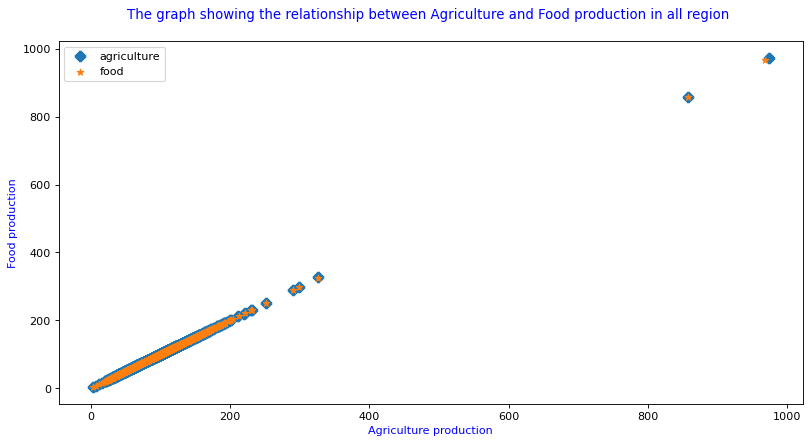

In [17]:
plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(agriculture_data['Value'],agriculture_data['Value'],marker='x', cmap='rainbow',linewidth=7, label='agriculture')
plt.scatter(food_data['Value'],food_data['Value'], cmap='g',marker='*',label='food')
plt.title('The graph showing the relationship between Agriculture and Food production in all region \n', color='b')
plt.xlabel('Agriculture production', color='b')
plt.ylabel('Food production', color='b')
plt.legend()
plt.show()

In [55]:
#The above 4 points in the graph above are the outliers

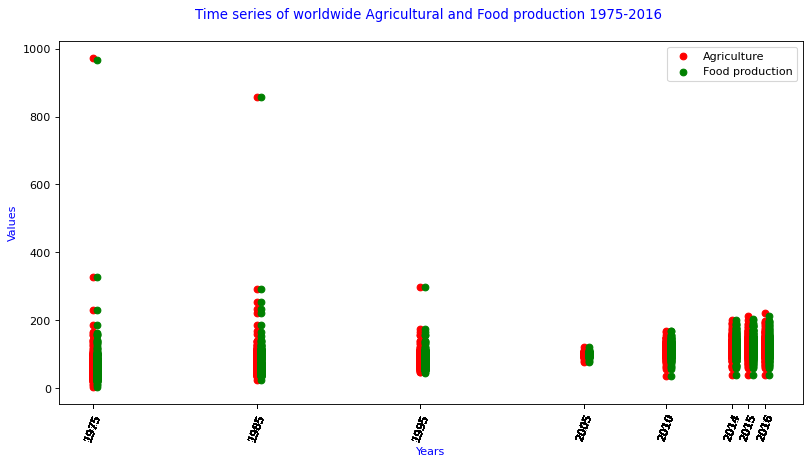

In [18]:
x1=food_data['Year']
x2=agriculture_data['Year']

plt.figure(figsize=(12, 6), dpi=80)
plt.scatter(x2,agriculture_data['Value'], color='r', label='Agriculture')
plt.scatter(x1+0.25,food_data['Value'], color='g', label='Food production')
plt.xticks(x2, rotation=70)
plt.title('Time series of worldwide Agricultural and Food production 1975-2016 \n', color='b')
plt.xlabel('Years',color='b')
plt.ylabel('Values',color='b')
plt.legend()
plt.show()

In [19]:
africa_data = data[data['region'].isin(africa_regions)]

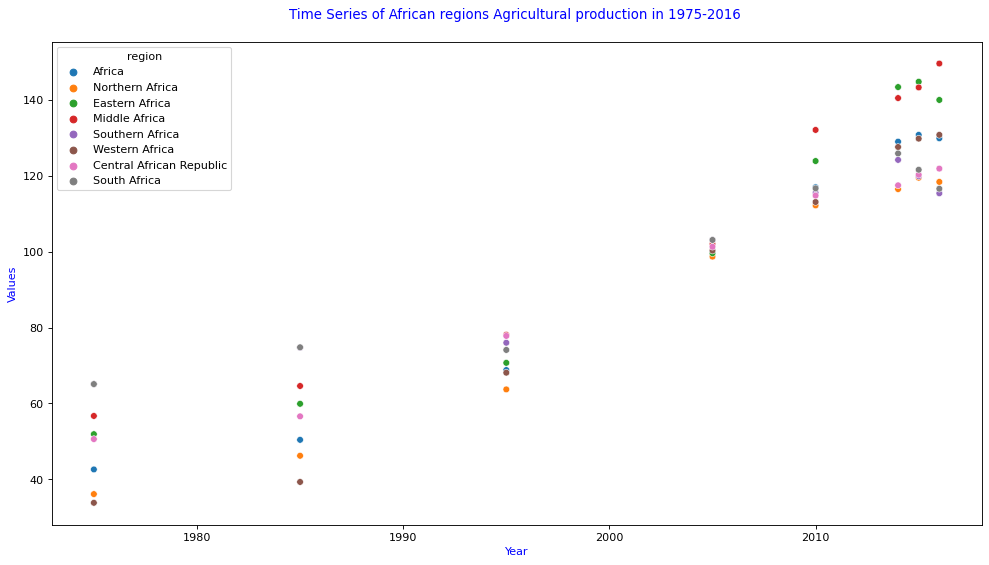

In [20]:
plt.figure(figsize=(15, 8), dpi=80)
africa_data = data[data['region'].isin(africa_regions)]

# Get agricultural data
africa_agri=africa_data[africa_data['Series']==0]

sns.scatterplot(x='Year', y='Value', data=africa_agri, hue='region')
plt.xlabel('Year', color='b')
plt.ylabel('Values', color='b')
plt.title('Time Series of African regions Agricultural production in 1975-2016 \n', color='b')

plt.show()

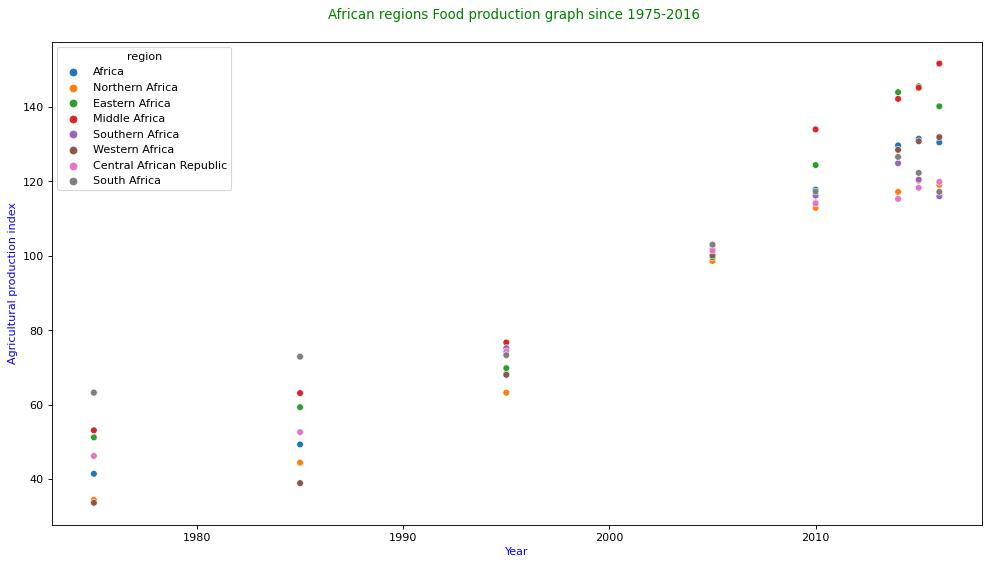

In [21]:
plt.figure(figsize=(15, 8), dpi=80)
africa_data = data[data['region'].isin(africa_regions)]

# Get food data
africa_agri=africa_data[africa_data['Series']==1]

sns.scatterplot(x='Year', y='Value', data=africa_agri, hue='region')
plt.xlabel('Year', color='b')
plt.ylabel('Agricultural production index', color='b')
plt.title('African regions Food production graph since 1975-2016 \n', color='g')

plt.show()

# Responding to our questions through visual graphics

# 1.how has been the agricultural & food production in African regions from 1975 to 2016?

In [22]:
africa_df=africa_data[['region','Year','Series','Value']]

In [23]:
#Agricultural index

In [24]:
africa_agri=africa_df.loc[ africa_df['Series'] == 0 ]

In [25]:
africa_agri=africa_agri.reset_index()

In [26]:
africa_agri=africa_agri[['region','Year','Value']]

In [27]:
#pivot table showing agricultural production index in All african Regions
african_agri_pivot=africa_agri.pivot(*africa_agri).rename_axis(columns=None).reset_index() 
african_agri_pivot

region  1975  1985  1995   2005   2010   2014   2015  \
0                    Africa  42.6  50.4  68.8  100.0  117.0  129.0  130.8   
1  Central African Republic  50.6  56.6  77.8  101.3  114.8  117.5  120.3   
2            Eastern Africa  51.9  59.9  70.7   99.6  123.9  143.4  144.8   
3             Middle Africa  56.7  64.6  78.1  102.0  132.1  140.5  143.3   
4           Northern Africa  36.1  46.2  63.7   98.7  112.2  116.5  119.5   
5              South Africa  65.1  74.8  74.1  103.1  116.7  125.9  121.6   
6           Southern Africa  65.1  74.7  76.0  103.1  115.5  124.2  119.9   
7            Western Africa  33.8  39.3  68.1  100.3  113.1  127.6  129.8   

    2016  
0  129.9  
1  121.9  
2  140.0  
3  149.6  
4  118.4  
5  116.6  
6  115.4  
7  130.8

In [28]:
africa_agri_group=african_agri_pivot.groupby('region')

In [65]:
EA=africa_agri_group.get_group('Eastern Africa').T[2].reset_index().iloc[1:, :].rename(columns = {'index':'year',2:'agriculture'})

In [66]:
SA=africa_agri_group.get_group('Southern Africa').T[6].reset_index().iloc[1:, :].rename(columns = {'index':'year',6:'agriculture'})

In [67]:
WA=africa_agri_group.get_group('Western Africa').T[7].reset_index().iloc[1:, :].rename(columns = {'index':'year',7:'agriculture'})

In [68]:
NA=africa_agri_group.get_group('Northern Africa').T[4].reset_index().iloc[1:, :].rename(columns = {'index':'year',4:'agriculture'})

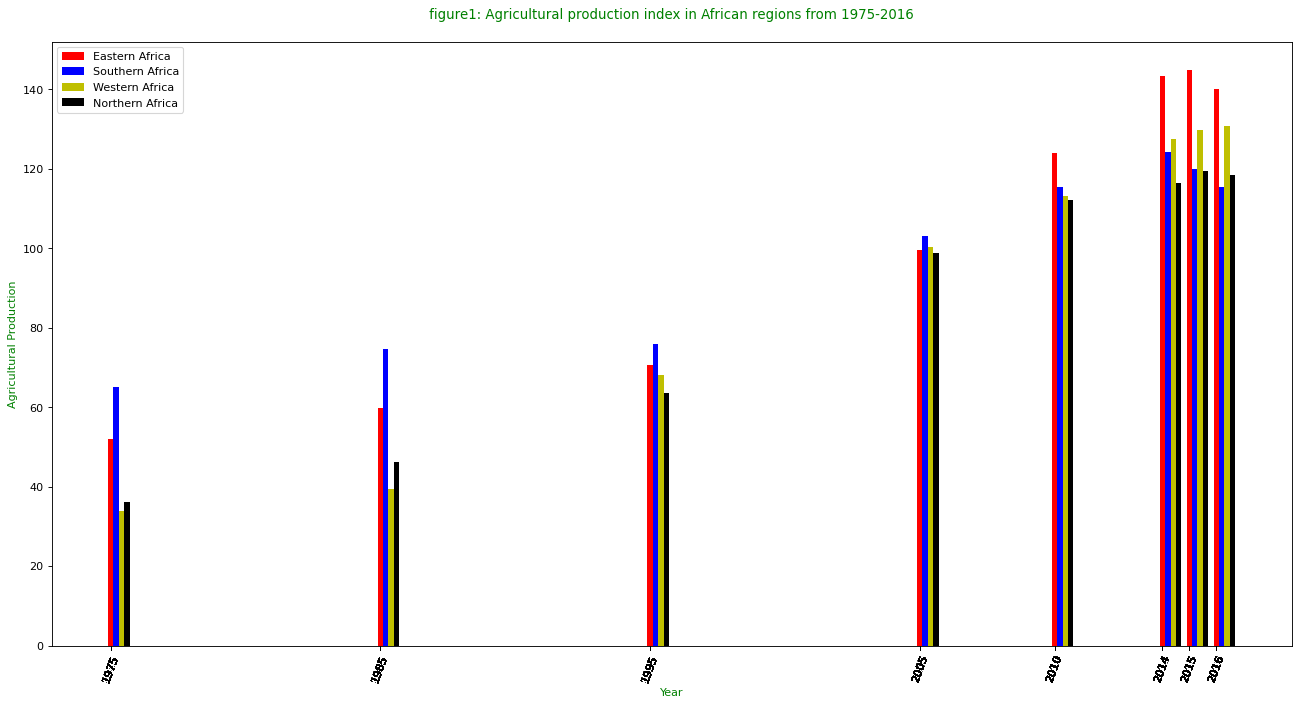

In [82]:
#Plot of Agricultural production index
plt.figure(figsize=(20,10),dpi=80)
plt.bar(EA['year'], EA['agriculture'], width=0.2, color='r', label='Eastern Africa')
plt.bar(SA['year']+0.20, SA['agriculture'], width=0.2, color='b', label='Southern Africa')
plt.bar(WA['year']+0.40, WA['agriculture'], width=0.2, color='y', label='Western Africa')
plt.bar(NA['year']+0.60, NA['agriculture'], width=0.2, color='black', label='Northern Africa')
plt.title(' figure1: Agricultural production index in African regions from 1975-2016 \n', color='g')
plt.xlabel('Year', color='g')
plt.xticks(x2, rotation=70)
plt.ylabel('Agricultural Production', color='g')
plt.legend()
plt.show()

In [34]:
#Food production index

In [70]:
africa_foo=africa_df.loc[ africa_df['Series'] == 1 ]
africa_foo=africa_foo.reset_index()
africa_foo=africa_foo[['region','Year','Value']]
african_foo_pivot=africa_foo.pivot(*africa_foo).rename_axis(columns=None).reset_index() 
africa_foo_group=african_foo_pivot.groupby('region')
EAF=africa_foo_group.get_group('Eastern Africa').T[2].reset_index().iloc[1:, :].rename(columns = {'index':'year',2:'food'})
SAF=africa_foo_group.get_group('Southern Africa').T[6].reset_index().iloc[1:, :].rename(columns = {'index':'year',6:'food'})
WAF=africa_foo_group.get_group('Western Africa').T[7].reset_index().iloc[1:, :].rename(columns = {'index':'year',7:'food'})
NAF=africa_foo_group.get_group('Northern Africa').T[4].reset_index().iloc[1:, :].rename(columns = {'index':'year',4:'food'})

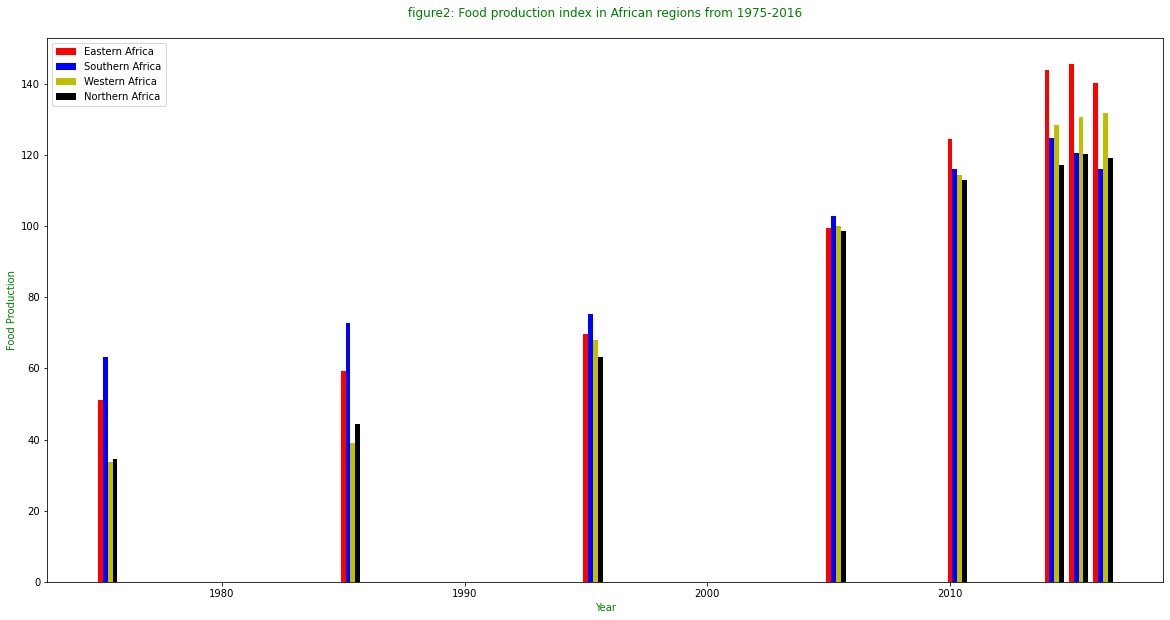

In [71]:
#Plot of Food production index
plt.figure(figsize=(20,10))
plt.bar(EAF['year'], EAF['food'], width=0.2, color='r', label='Eastern Africa')
plt.bar(SAF['year']+0.20, SAF['food'], width=0.2, color='b', label='Southern Africa')
plt.bar(WAF['year']+0.40, WAF['food'], width=0.2, color='y', label='Western Africa')
plt.bar(NAF['year']+0.60, NAF['food'], width=0.2, color='black', label='Northern Africa')
plt.title(' figure2: Food production index in African regions from 1975-2016 \n', color='g')
plt.xlabel('Year', color='g')
plt.ylabel('Food Production', color='g')
plt.legend()
plt.show()
# plt.xticks(EA['year']);

# 2. In which year does East Africa perform well and bad  in Agriculture ?

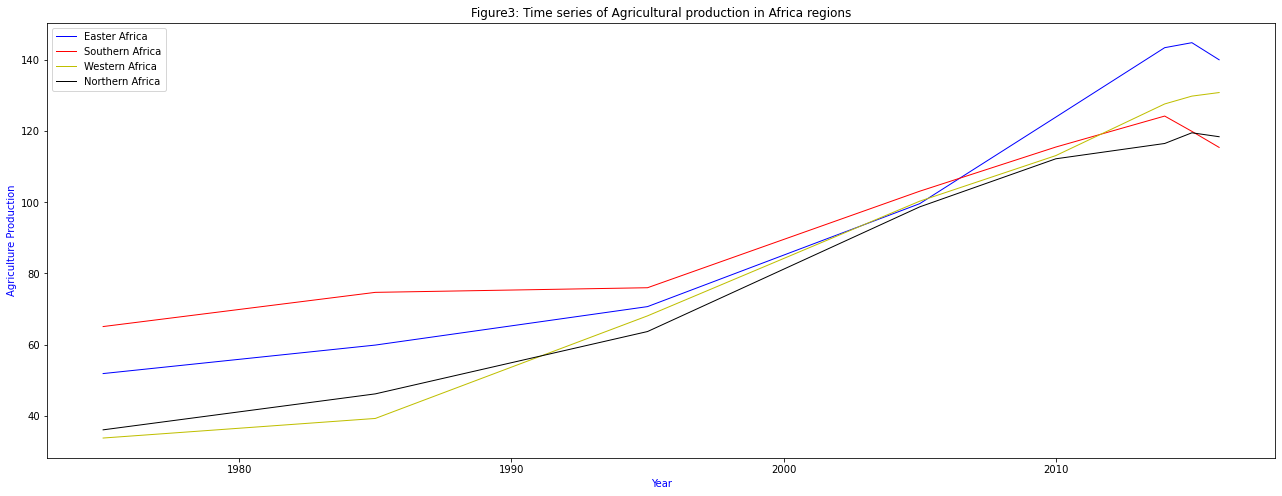

In [72]:
plt.figure(figsize=(22, 8))
plt.plot(EA['year'], EA['agriculture'], color='Blue', label='Easter Africa',linewidth=1)
plt.plot(SA['year'], SA['agriculture'], color='r', label='Southern Africa',linewidth=1)
plt.plot(WA['year'], WA['agriculture'], color='y', label='Western Africa',linewidth=1)
plt.plot(NA['year'], NA['agriculture'], color='black', label='Northern Africa',linewidth=1)
plt.title('Figure3: Time series of Agricultural production in Africa regions')
plt.xlabel('Year', color='b')
plt.ylabel('Agriculture Production', color='b')
plt.legend()
plt.show()
#plt.xticks(merged_af_p['Year']);

# 3. In which year does East Africa perform well and bad in Food production

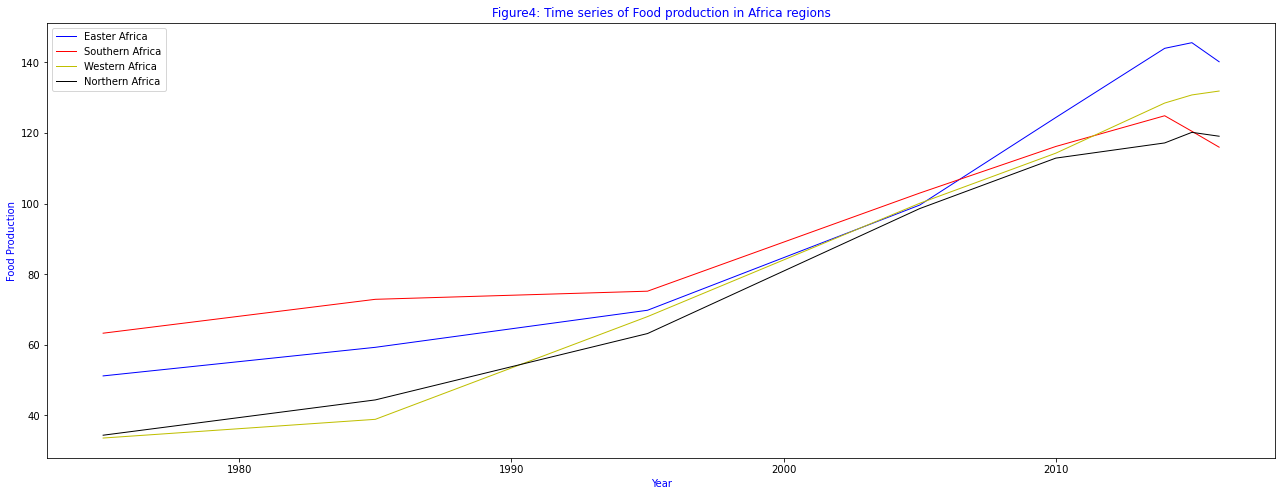

In [73]:
plt.figure(figsize=(22, 8))
plt.plot(EAF['year'], EAF['food'], color='Blue', label='Easter Africa',linewidth=1)
plt.plot(SAF['year'], SAF['food'], color='r', label='Southern Africa',linewidth=1)
plt.plot(WAF['year'], WAF['food'], color='y', label='Western Africa',linewidth=1)
plt.plot(NAF['year'], NAF['food'], color='black', label='Northern Africa',linewidth=1)
plt.title('Figure4: Time series of Food production in Africa regions',color='b')
plt.xlabel('Year', color='b')
plt.ylabel('Food Production', color='b')
plt.legend()
plt.show()
#plt.xticks(merged_af_p['Year']);

# 4. Performance of Rwanda compared to other countries in east african community

In [74]:
EAC_countries=['Rwanda','Kenya','Tanzania','Burundi','Uganda']

In [75]:
EAC_data = data[data['region'].isin(EAC_countries)]

In [87]:
EAC_agri=EAC_data.loc[EAC_data['Series']==0]
EAC_agri=EAC_agri[EAC_agri['Year'] >=2010]
EAC_agri

Region/Country/Area   region  Year  Series  Value Footnotes  \
890                   108  Burundi  2010       0  108.1       NaN   
891                   108  Burundi  2014       0  108.5       NaN   
892                   108  Burundi  2015       0  101.0       NaN   
893                   108  Burundi  2016       0  107.8       NaN   
2014                  404    Kenya  2010       0  122.6       NaN   
2015                  404    Kenya  2014       0  125.0       NaN   
2016                  404    Kenya  2015       0  126.9       NaN   
2017                  404    Kenya  2016       0  125.8       NaN   
2910                  646   Rwanda  2010       0  139.5       NaN   
2911                  646   Rwanda  2014       0  153.6       NaN   
2912                  646   Rwanda  2015       0  149.4       NaN   
2913                  646   Rwanda  2016       0  140.1       NaN   
3484                  800   Uganda  2010       0   89.3       NaN   
3485                  800   Uganda  2014       0   94.4       NaN   
3486                  800   Uganda  2015       0   93.8       NaN   
3487                  800   Uganda  2016       0   91.8       NaN   

                                                 Source  NaNStatus  
890   Food and Agriculture Organization of the Unite...       True  
891   Food and Agriculture Organization of the Unite...       True  
892   Food and Agriculture Organization of the Unite...       True  
893   Food and Agriculture Organization of the Unite...       True  
2014  Food and Agriculture Organization of the Unite...       True  
2015  Food and Agriculture Organization of the Unite...       True  
2016  Food and Agriculture Organization of the Unite...       True  
2017  Food and Agriculture Organization of the Unite...       True  
2910  Food and Agriculture Organization of the Unite...       True  
2911  Food and Agriculture Organization of the Unite...       True  
2912  Food and Agriculture Organization of the Unite...       True  
2913  Food and Agriculture Organization of the Unite...       True  
3484  Food and Agriculture Organization of the Unite...       True  
3485  Food and Agriculture Organization of the Unite...       True  
3486  Food and Agriculture Organization of the Unite...       True  
3487  Food and Agriculture Organization of the Unite...       True

In [88]:
EAC_food=EAC_data.loc[EAC_data['Series']==1]
EAC_food=EAC_food[EAC_food['Year'] >=2010]
EAC_food

Region/Country/Area   region  Year  Series  Value Footnotes  \
898                   108  Burundi  2010       1  113.9       NaN   
899                   108  Burundi  2014       1  121.5       NaN   
900                   108  Burundi  2015       1  111.5       NaN   
901                   108  Burundi  2016       1  120.3       NaN   
2022                  404    Kenya  2010       1  123.6       NaN   
2023                  404    Kenya  2014       1  125.3       NaN   
2024                  404    Kenya  2015       1  128.4       NaN   
2025                  404    Kenya  2016       1  125.7       NaN   
2918                  646   Rwanda  2010       1  140.1       NaN   
2919                  646   Rwanda  2014       1  154.6       NaN   
2920                  646   Rwanda  2015       1  150.0       NaN   
2921                  646   Rwanda  2016       1  140.4       NaN   
3492                  800   Uganda  2010       1   88.2       NaN   
3493                  800   Uganda  2014       1   92.0       NaN   
3494                  800   Uganda  2015       1   91.7       NaN   
3495                  800   Uganda  2016       1   89.6       NaN   

                                                 Source  NaNStatus  
898   Food and Agriculture Organization of the Unite...       True  
899   Food and Agriculture Organization of the Unite...       True  
900   Food and Agriculture Organization of the Unite...       True  
901   Food and Agriculture Organization of the Unite...       True  
2022  Food and Agriculture Organization of the Unite...       True  
2023  Food and Agriculture Organization of the Unite...       True  
2024  Food and Agriculture Organization of the Unite...       True  
2025  Food and Agriculture Organization of the Unite...       True  
2918  Food and Agriculture Organization of the Unite...       True  
2919  Food and Agriculture Organization of the Unite...       True  
2920  Food and Agriculture Organization of the Unite...       True  
2921  Food and Agriculture Organization of the Unite...       True  
3492  Food and Agriculture Organization of the Unite...       True  
3493  Food and Agriculture Organization of the Unite...       True  
3494  Food and Agriculture Organization of the Unite...       True  
3495  Food and Agriculture Organization of the Unite...       True

# 4.1 What is the best and last EAC country in Agricultural production from 2010-2016 ?

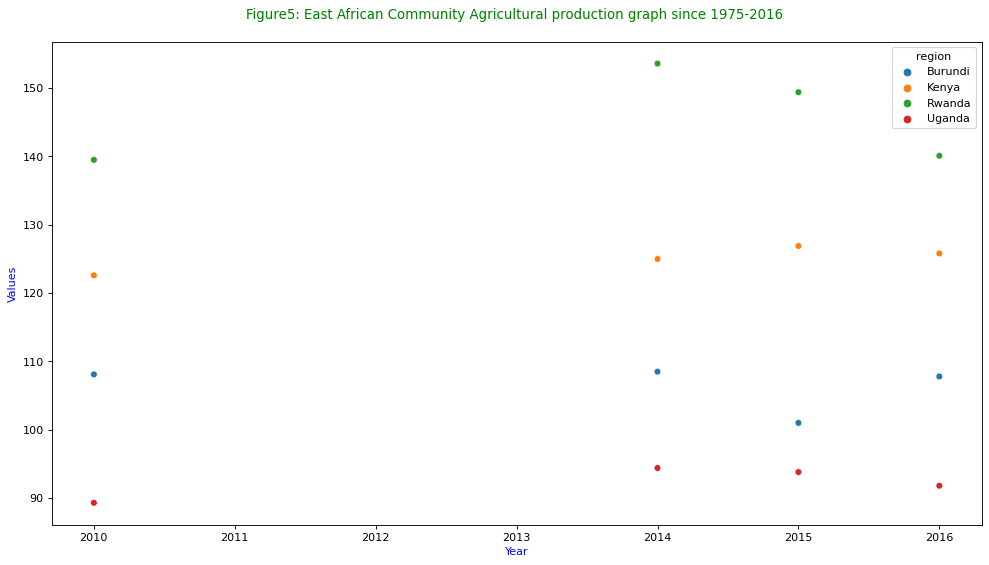

In [90]:
#Plot of Agricultural production index in East African Community
# Tanzania and South sudan has no data
plt.figure(figsize=(15, 8), dpi=80)
sns.scatterplot(x='Year', y='Value', data=EAC_agri, hue='region')
plt.xlabel('Year', color='b')
plt.ylabel('Values', color='b')
plt.title('Figure5: East African Community Agricultural production graph since 2010-2016 \n', color='g')
plt.show()

In [45]:
# 4.2 What is the best and last EAC country in Food production ?

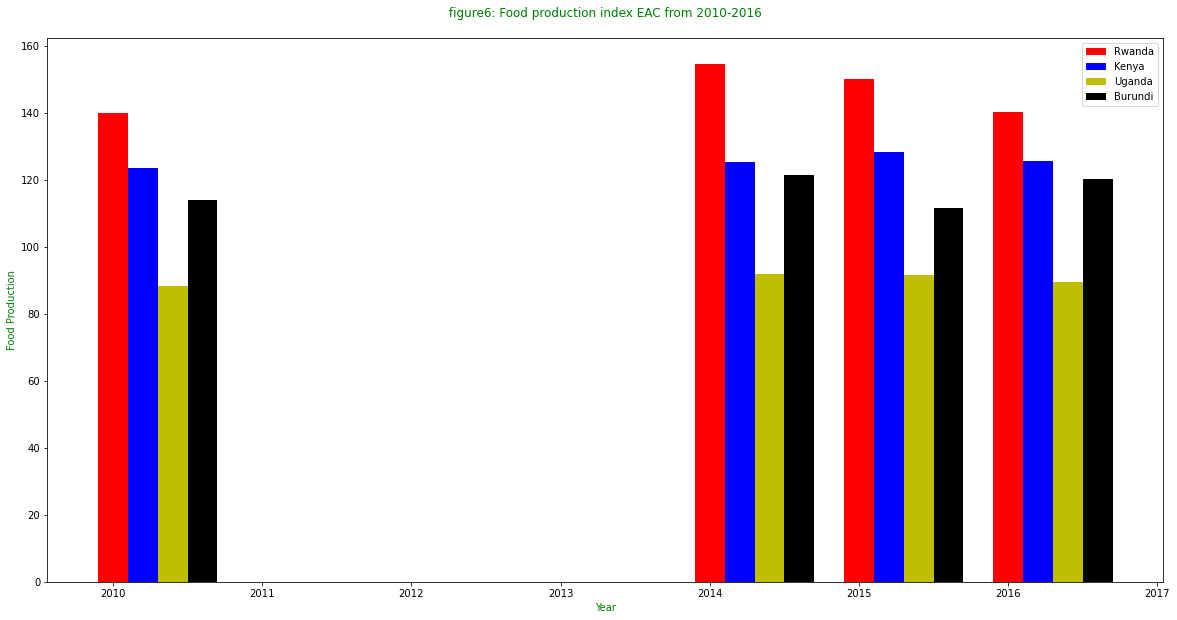

In [96]:
#Plot of Food production index in East African Community
# Tanzania and South sudan has no data
plt.figure(figsize=(20,10))
plt.bar(EAC_food[ EAC_food['region']=='Rwanda' ]['Year'], EAC_food[ EAC_food['region']=='Rwanda' ]['Value'], width=0.2, color='r',align='center', label='Rwanda')
plt.bar(EAC_food[ EAC_food['region']=='Kenya' ]['Year']+0.20, EAC_food[ EAC_food['region']=='Kenya' ]['Value'], width=0.2, color='b', label='Kenya')
plt.bar(EAC_food[ EAC_food['region']=='Uganda' ]['Year']+0.40, EAC_food[ EAC_food['region']=='Uganda' ]['Value'], width=0.2, color='y', label='Uganda')
plt.bar(EAC_food[ EAC_food['region']=='Burundi' ]['Year']+0.60, EAC_food[ EAC_food['region']=='Burundi' ]['Value'], width=0.2, color='black', label='Burundi')
plt.title(' figure6: Food production index EAC from 2010-2016 \n', color='g')
plt.xlabel('Year', color='g')
plt.ylabel('Food Production', color='g')
plt.legend()
plt.show()

# 5. Does the performance in Agriculture contribute to the performance of food production in East Africa?

In [47]:
east_africa = data[data['region']=='Eastern Africa']

In [48]:
east_africa_agri=east_africa[ east_africa['Series'] ==0 ]
east_africa_agri=east_africa_agri['Value']

In [49]:
east_africa_food=east_africa[ east_africa['Series'] ==1 ]
east_africa_food=east_africa_food['Value']

In [50]:
#EAC_agri_food=pd.concat(east_africa_agri,east_africa_food)

#pd.concat([east_africa_agri, east_africa_food])

In [51]:
correlation=(pd.DataFrame([list(east_africa_agri),list(east_africa_food)]).T).corr()

In [109]:
#Agriculture-0
#Food-1
print('Figure7.1: Correlation between Agricultural and food production in East Africa')
#sns.heatmap(correlation,annot=True, cmap='Reds',fmt='.3g')
correlation

Figure7.1: Correlation between Agricultural and food production in East Africa


0         1
0  1.000000  0.999984
1  0.999984  1.000000

In [107]:
#There is strong positive relationship between Agriculture and food production in east africa .i.e 0.9
fanda=(pd.DataFrame([list(east_africa_agri),list(east_africa_food)]).T)
fanda=fanda.rename(columns={0:'agriculture',1:'food'})

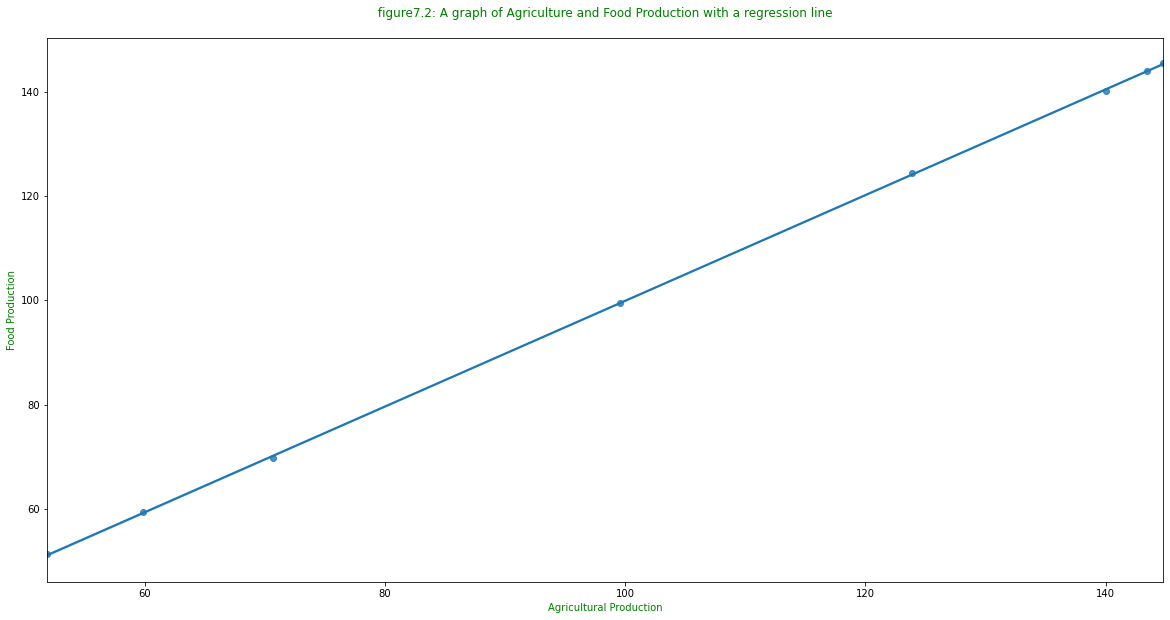

In [112]:
plt.figure(figsize=(20,10))
sns.regplot(x = "agriculture", y = "food", data = fanda)
plt.title(' figure7.2: A graph of Agriculture and Food Production with a regression line \n', color='g')
plt.xlabel('Agricultural Production', color='g')
plt.ylabel('Food Production', color='g')
plt.show()